In [ ]:
import lightgbm

In [ ]:
from xgboost import XGBRegressor
x = XGBRegressor()
x

In [1]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns

# 1.数据观测

In [3]:
df = pd.read_csv('./dataset/train.csv')#[:50000]
df.head(10)

,时间,小区名,小区房屋出租数量,楼层,总楼层,房屋面积,房屋朝向,居住状态,卧室数量,厅的数量,卫的数量,出租方式,区,位置,地铁线路,地铁站点,距离,装修情况,月租金
0,1,3072,0.128906,2,0.236364,0.008628,东南,NaN,1,1,1,NaN,11.0,118.0,2.0,40.0,0.764167,NaN,5.602716
1,1,3152,0.132812,1,0.381818,0.017046,东,NaN,1,0,0,NaN,10.0,100.0,4.0,58.0,0.709167,NaN,16.977929
2,1,5575,0.042969,0,0.290909,0.010593,东南,NaN,2,1,2,NaN,12.0,130.0,5.0,37.0,0.572500,NaN,8.998302
3,1,3103,0.085938,2,0.581818,0.019199,南,NaN,3,2,2,NaN,7.0,90.0,2.0,63.0,0.658333,NaN,5.602716
4,1,5182,0.214844,0,0.545455,0.010427,东北,NaN,2,1,1,NaN,3.0,31.0,NaN,NaN,NaN,NaN,7.300509
5,1,1192,0.039062,2,0.309091,0.012579,南,NaN,2,1,1,NaN,3.0,143.0,3.0,59.0,0.495833,NaN,4.923599
6,1,1122,0.125000,0,0.381818,0.010593,南,NaN,3,1,1,NaN,11.0,48.0,2.0,9.0,0.193333,NaN,6.621392
7,1,1251,0.128906,2,0.363636,0.018040,南,NaN,4,2,2,NaN,12.0,52.0,NaN,NaN,NaN,NaN,14.091681
8,1,4718,0.246094,2,0.309091,0.007850,西南,NaN,1,1,1,NaN,3.0,143.0,NaN,NaN,NaN,NaN,4.584041
9,1,2654,0.218750,2,0.890909,0.020026,东南,NaN,2,1,2,NaN,10.0,43.0,4.0,58.0,0.400000,NaN,39.558574


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196539 entries, 0 to 196538
Data columns (total 19 columns):
时间          196539 non-null int64
小区名         196539 non-null int64
小区房屋出租数量    195538 non-null float64
楼层          196539 non-null int64
总楼层         196539 non-null float64
房屋面积        196539 non-null float64
房屋朝向        196539 non-null object
居住状态        20138 non-null float64
卧室数量        196539 non-null int64
厅的数量        196539 non-null int64
卫的数量        196539 non-null int64
出租方式        24230 non-null float64
区           196508 non-null float64
位置          196508 non-null float64
地铁线路        91778 non-null float64
地铁站点        91778 non-null float64
距离          91778 non-null float64
装修情况        18492 non-null float64
月租金         196539 non-null float64
dtypes: float64(12), int64(6), object(1)
memory usage: 28.5+ MB


In [5]:
# sns.boxplot(df['房屋面积'], df['月租金'])

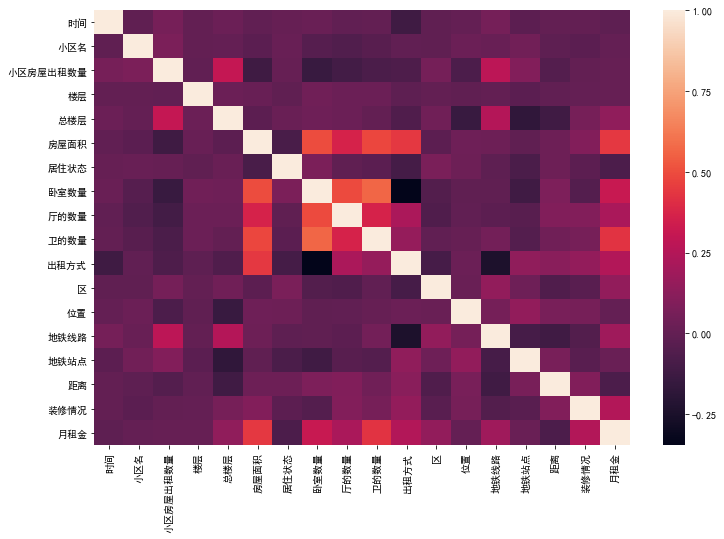

In [12]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr)

In [13]:
df.describe()

,时间,小区名,小区房屋出租数量,楼层,总楼层,房屋面积,居住状态,卧室数量,厅的数量,卫的数量,出租方式,区,位置,地铁线路,地铁站点,距离,装修情况,月租金
count,196539.000000,196539.000000,195538.000000,196539.000000,196539.000000,196539.000000,20138.000000,196539.000000,196539.000000,196539.000000,24230.000000,196508.000000,196508.000000,91778.000000,91778.000000,91778.000000,18492.000000,196539.000000
mean,2.115229,3224.116562,0.124151,0.955449,0.408711,0.013139,2.725196,2.236635,1.299625,1.223818,0.900289,7.905139,67.945982,3.284850,57.493735,0.551202,3.589228,7.949313
std,0.786980,2023.073726,0.133299,0.851511,0.183100,0.008104,0.667763,0.896961,0.613169,0.487234,0.299621,4.025696,43.522394,1.477147,35.191414,0.247268,1.996912,6.310609
min,1.000000,0.000000,0.007812,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.001667,1.000000,0.000000
25%,1.000000,1388.000000,0.039062,0.000000,0.290909,0.009268,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,33.000000,2.000000,23.000000,0.356667,2.000000,4.923599
50%,2.000000,3086.000000,0.082031,1.000000,0.418182,0.012910,3.000000,2.000000,1.000000,1.000000,1.000000,9.000000,61.000000,4.000000,59.000000,0.554167,2.000000,6.621392
75%,3.000000,5199.000000,0.160156,2.000000,0.563636,0.014896,3.000000,3.000000,2.000000,1.000000,1.000000,11.000000,103.000000,5.000000,87.000000,0.745833,6.000000,8.998302
max,3.000000,6627.000000,1.000000,2.000000,1.000000,1.000000,3.000000,11.000000,8.000000,8.000000,1.000000,14.000000,152.000000,5.000000,119.000000,1.000000,6.000000,100.000000


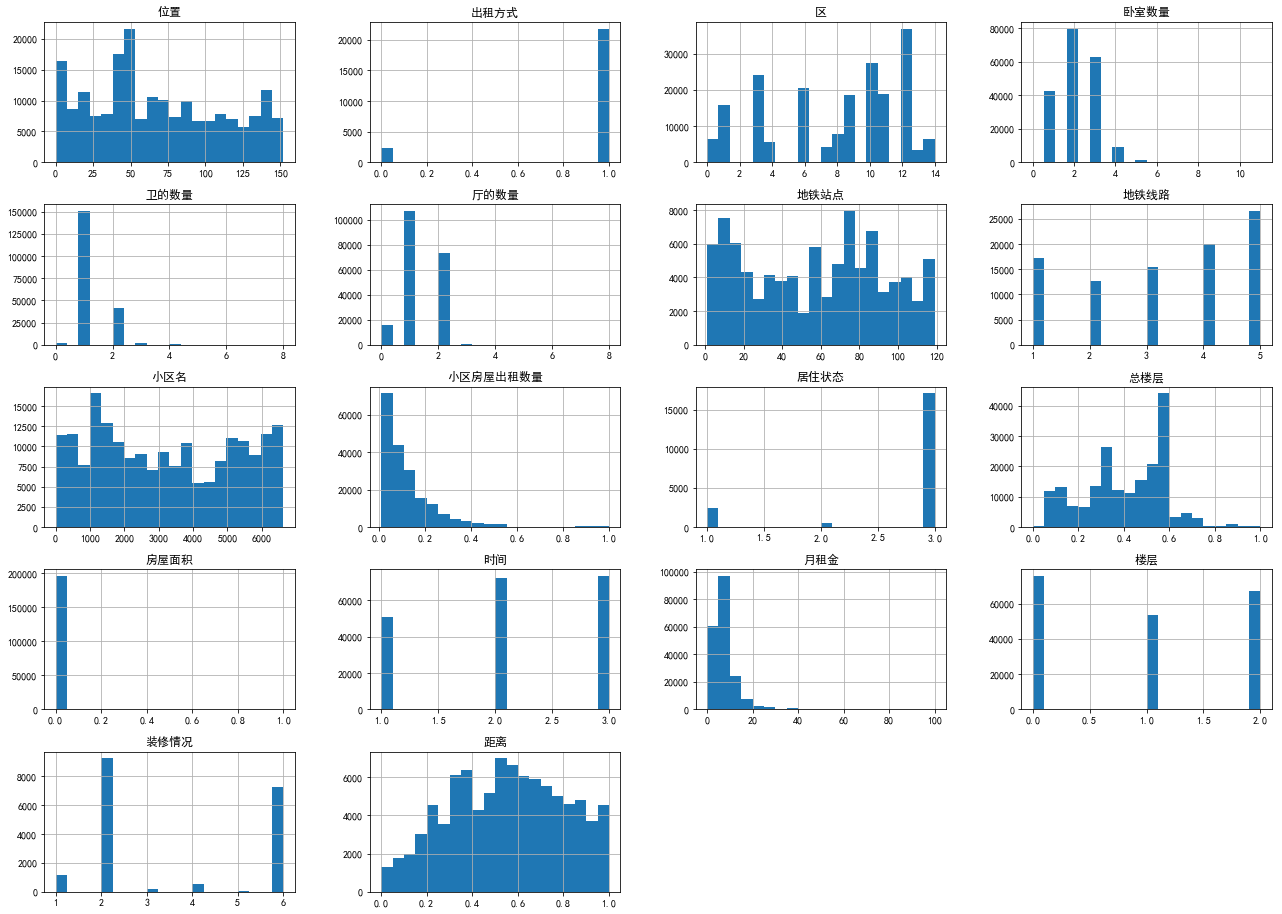

In [15]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(22,16))
plt.show()

In [ ]:
var = '房屋面积'
data = pd.concat([df['月租金'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='月租金', data=data)
fig.axis(ymin=0, ymax=1);

In [ ]:
print(df['时间'].value_counts(normalize=True))
print(df['装修情况'].value_counts(normalize=True))
print(df['地铁线路'].value_counts(normalize=True)) 
print(df['居住状态'].value_counts(normalize=True))
df['出租方式'].value_counts(normalize=True)

# 2.特征工程
有的太小了，要“归一化”统一量纲
要让那些值 别按照“数”来处理

In [ ]:
df.mean()

In [ ]:
# df = df.fillna('-1')
df_full = df.fillna(df.mean()) #是自动按每列的均值的
print(df_full.shape)
# df_oh = pd.get_dummies(df)
y = df_full['月租金']
X_ori = df_full.drop(['月租金','房屋朝向'],axis=1)
X_ori.head()

In [ ]:
a = np.empty([2,3])
b = np.arange(6).reshape(2,3)
b+a

In [ ]:
print(X_ori['装修情况'].value_counts(normalize=True))

In [ ]:
# X = pd.get_dummies(X_ori)
X = X_ori
X.head()

# 3.training

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error



# reg = svm.SVR()
reg = RandomForestRegressor()
reg.fit(X, y)

y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
mse

#### 3.2 try Keras

In [ ]:
import keras


In [ ]:
# sc = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
# sc